# Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1. Read Data

df = pd.read_csv('E:\DS\ML\project\ML_project_7_SuperMarket\data.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,13:08,Ewallet,522.83,4.761905,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-19,10:29,Cash,76.40,4.761905,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,324.31,4.761905,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,NaN,02-08-19,10:37,Ewallet,604.17,4.761905,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,NaN,40.35,4.761905,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-19,17:16,Ewallet,973.80,4.761905,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-19,13:22,Cash,31.84,4.761905,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,NaN,2/22/2019,15:33,NaN,65.82,4.761905,4.1


# A) EDA 

## 1. Describe your Data in own Words
1. This SuperMarket Data contains information of 3 months as many competetitors are their in market so we have to provide more    good service to a customers so that they can attract more to stores. In given data their is column of 'Rating' ,customer give his overall rating about exeperince in store. 
2.  So we can to analyse & predict  'Rating'  column for how we can improve our services & offers for diff customers give good rating. 
3. Now here Target Variable is 'Rating'.

## 2. Check Datatypes of each column and Bring Date time together in one column.

In [3]:
# Data types of column
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
Rating                     float64
dtype: object

In [5]:
# create DateTime column by merging  2 diff coln
df['DateTime'] =df['Date']+df['Time']

# Drop date & Time coln 
df.drop(['Date', 'Time'] ,axis=1,inplace=True)
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,Rating,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,9.1,01-05-1913:08
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,9.6,03-08-1910:29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,7.4,03-03-1913:23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,8.4,1/27/201920:33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,NaN,Ewallet,604.17,4.761905,5.3,02-08-1910:37


## 3. Find the Null Values and Treat them Appropriately. 

In [7]:
# missing values
df.isna().sum()

Invoice ID                   0
Branch                       0
City                         0
Customer type                0
Gender                       0
Product line                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Total                      122
Payment                     50
cogs                         0
gross margin percentage      0
Rating                       0
DateTime                     0
dtype: int64

 Total & Payment has null values replace with appropriate metrics

In [8]:
# analyse coln Total to replace null with appropriate metrics 
df.describe() 

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,Rating
count,1000.000000,1000.000000,1000.000000,878.000000,1000.00000,1.000000e+03,1000.00000
mean,55.672130,5.510000,15.379369,316.011791,307.58738,4.761905e+00,6.97270
std,26.494628,2.923431,11.708825,243.243460,234.17651,6.220360e-14,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,4.00000
25%,32.875000,3.000000,5.924875,118.413750,118.49750,4.761905e+00,5.50000
50%,55.230000,5.000000,12.088000,245.358750,241.76000,4.761905e+00,7.00000
75%,77.935000,8.000000,22.445250,470.447250,448.90500,4.761905e+00,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,10.00000


In [9]:
# replace null values
df['Total'].fillna(df['Total'].mean(), inplace=True)
df['Payment'].fillna(df['Payment'].mode()[0], inplace=True)

### Again check null values  

In [10]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
Rating                     0
DateTime                   0
dtype: int64

## 4. Count the No. of Branches and Cities. 

A    340
B    332
C    328
Name: Branch, dtype: int64


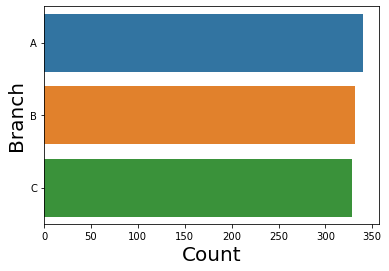

In [11]:
# Branch_count
print( df['Branch'].value_counts() )

ax =sns.barplot(y=df['Branch'].value_counts().index, x=df['Branch'].value_counts())
ax.set_xlabel('Count',size=20)
ax.set_ylabel('Branch', size=20);

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


Text(0, 0.5, 'city')

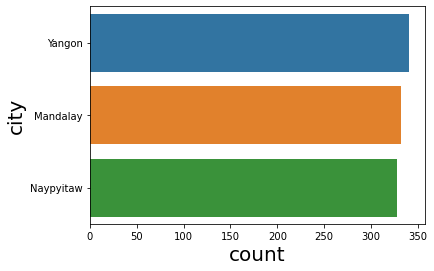

In [12]:
# City_Count
print(df['City'].value_counts())

ax = sns.barplot(y=df['City'].value_counts().index, x=df['City'].value_counts()) # instaed of index , key can use
ax.set_xlabel('count',size=20)
ax.set_ylabel('city',size=20)

## 5. Create a pie chart of gender. 

Female    501
Male      499
Name: Gender, dtype: int64


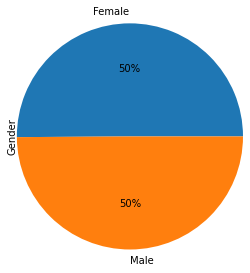

In [13]:
print( df['Gender'].value_counts() )
ax=df.groupby('Gender')['Gender'].count().plot(kind='pie', autopct='%1.0f%%', radius=1.3);

Almost same no.  of Male & Female visit to Supermarket shop 

## 6. Calculate Average Rating for each product line. 

In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,Rating,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.971500,Ewallet,522.83,4.761905,9.1,01-05-1913:08
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.220000,Cash,76.40,4.761905,9.6,03-08-1910:29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.525500,Credit card,324.31,4.761905,7.4,03-03-1913:23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.048000,Ewallet,465.76,4.761905,8.4,1/27/201920:33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,316.011791,Ewallet,604.17,4.761905,5.3,02-08-1910:37


Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


Text(0, 0.5, 'Avg.Rating')

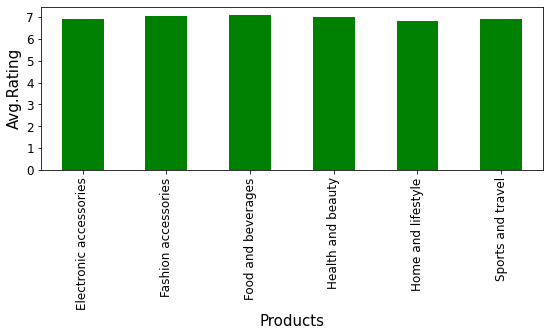

In [15]:
print( df.groupby('Product line')['Rating'].mean() );

#Visualisation
plt.figure(figsize=(9,3))
ax=df.groupby('Product line')['Rating'].mean().plot(kind='bar', color='g', fontsize=12)
ax.set_xlabel('Products',size=15)
ax.set_ylabel('Avg.Rating',size=15)

from above we see that Food and Beverages has Highest Rating 

## 7. No. of products in each category. 

If one ProductLine category has diff Unit price meaning that it is different variety of that Product cartegory 
so calculate no. of products in each productLine Category to get the above solution

In [16]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,Rating,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.971500,Ewallet,522.83,4.761905,9.1,01-05-1913:08
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.220000,Cash,76.40,4.761905,9.6,03-08-1910:29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.525500,Credit card,324.31,4.761905,7.4,03-03-1913:23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.048000,Ewallet,465.76,4.761905,8.4,1/27/201920:33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,316.011791,Ewallet,604.17,4.761905,5.3,02-08-1910:37


In [17]:
ax = df.groupby('Product line')['Unit price'].count()
ax

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Unit price, dtype: int64

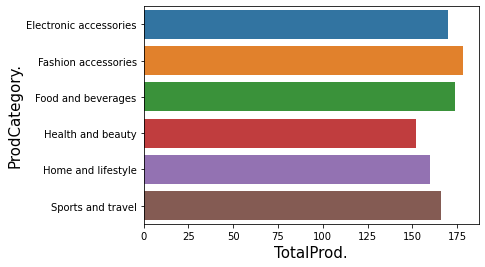

In [18]:
px = sns.barplot(y=ax.index, x=ax)
px.set_xlabel('TotalProd.', size=15)
px.set_ylabel('ProdCategory.', size=15);

From above, 'Fashion acessories' & 'Food and beverages' are having Maximum Product variety init.

## 8. Total Amount collected in each product line 

In [19]:
ax = df.groupby('Product line')['Total'].sum()
ax

Product line
Electronic accessories    53800.356738
Fashion accessories       54172.686738
Food and beverages        54930.869865
Health and beauty         49023.074320
Home and lifestyle        51075.478693
Sports and travel         53009.324648
Name: Total, dtype: float64

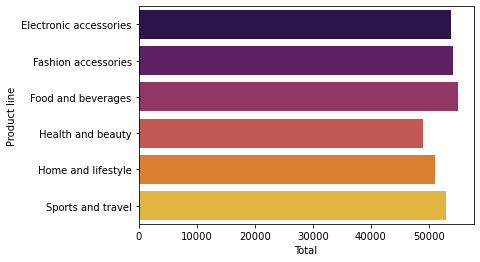

In [20]:
px = sns.barplot(y=ax.index, x=ax, palette='inferno')

As data is of last 3 Months so from last 3 months 'Food', 'Fashion, 'Electroninc' are having more than 50k $ amount collected whereas
Health and beauty category has low amount less than 50k dollar  .   

## 9. Find out highest percentage of payment method 

In [21]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,Rating,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.971500,Ewallet,522.83,4.761905,9.1,01-05-1913:08
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.220000,Cash,76.40,4.761905,9.6,03-08-1910:29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.525500,Credit card,324.31,4.761905,7.4,03-03-1913:23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.048000,Ewallet,465.76,4.761905,8.4,1/27/201920:33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,316.011791,Ewallet,604.17,4.761905,5.3,02-08-1910:37


In [22]:
# create table which has Payment & value in percentage 
af=pd.DataFrame()
af['payment']= df['Payment'].unique()
af['perc']=(df['Payment'].value_counts().values/df['Payment'].count() ) # calculate perc later round up

formate={'perc':'{:.2%}'} # adding perc symbol & roundup
af=af.style.format(formate).highlight_max(color='lightgreen').highlight_min(color='#cd4f39')
af

,payment,perc
0,Ewallet,37.70%
1,Cash,32.30%
2,Credit card,30.00%


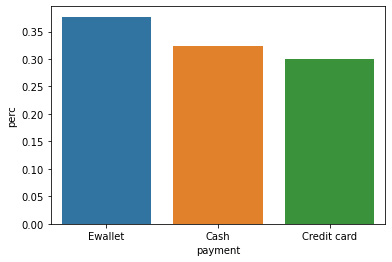

In [23]:
# Visualisation
af=pd.DataFrame()
af['payment']= df['Payment'].unique()
af['perc']=(df['Payment'].value_counts().values/df['Payment'].count() ) # calculate perc later round up
ax = sns.barplot(x=af['payment'], y=af['perc']);

Fromboth above, 'Ewallet' is most use payment method and 'credit card' is less used payment Method   

## 10. Find out the category with highest Rating. 

In [24]:
print('\nElectronic, Health&beauty, Sports&travel are having highest Rating ')
pd.DataFrame(df.groupby('Product line')['Rating'].max()).style.highlight_max(color='lightgreen')


Electronic, Health&beauty, Sports&travel are having highest Rating 


,Rating
Product line,
Electronic accessories,10.000000
Fashion accessories,9.900000
Food and beverages,9.900000
Health and beauty,10.000000
Home and lifestyle,9.900000
Sports and travel,10.000000


## 11. Most of People visit to shop are from which city 

In [25]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,Rating,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.971500,Ewallet,522.83,4.761905,9.1,01-05-1913:08
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.220000,Cash,76.40,4.761905,9.6,03-08-1910:29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.525500,Credit card,324.31,4.761905,7.4,03-03-1913:23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.048000,Ewallet,465.76,4.761905,8.4,1/27/201920:33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,316.011791,Ewallet,604.17,4.761905,5.3,02-08-1910:37


In [26]:
df.groupby('City')['Invoice ID'].count()

City
Mandalay     332
Naypyitaw    328
Yangon       340
Name: Invoice ID, dtype: int64

Text(0, 0.5, 'No.of people')

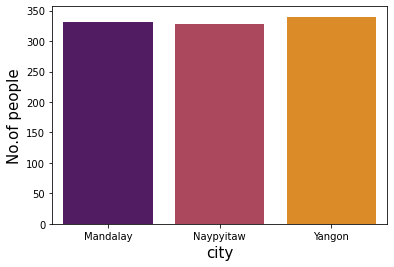

In [44]:
ax= df.groupby('City')['Invoice ID'].count()
ps=sns.barplot(x=ax.index, y=ax, palette='inferno', orient='v')
ps.set_xlabel('city', size=15)
ps.set_ylabel('No.of people', size=15)

Most of People visit to Supermarket are from 'Yangon' city and less People visit to supermarket are from 'Naypitaw' Hence we have to come with some offer for this 'Naypyitaw' city  

## 12. Which product line  has high Cost of goods (cogs) ?  

In [47]:
df.groupby('Product line')['cogs'].min()

Product line
Electronic accessories    25.45
Fashion accessories       12.09
Food and beverages        21.58
Health and beauty         17.75
Home and lifestyle        13.98
Sports and travel         10.17
Name: cogs, dtype: float64

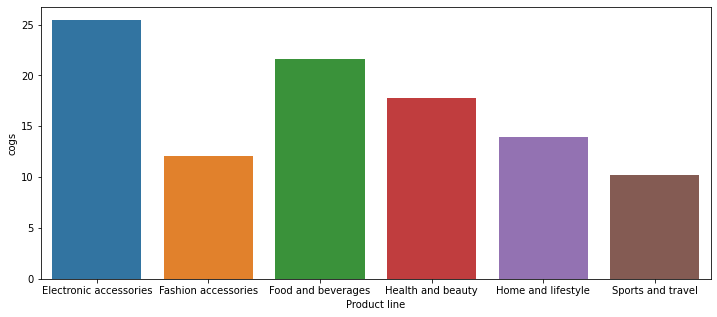

In [52]:
ax=df.groupby('Product line')['cogs'].min()
plt.figure(figsize=(12,5))
ps=sns.barplot(x=ax.index, y=ax)
